# Feature Engineering

In [355]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [356]:
data_path = "data/smartwatches.csv"
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
# train_df = df.sample(frac=0.8, random_state=42)
# train_df = train_df.reset_index()
# test_df = df.drop(train_df.index)
# test_df = test_df.reset_index()

In [357]:
train_df = df.copy() #for categorical data
#Remove comments in above for numerical data

In [358]:
#df.shape, train_df.shape, test_df.shape

In [359]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [360]:
#train_df.drop(['index','Unnamed: 0'], axis=1, inplace=True)
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
# inplace=True means that the changes are made in the original dataframe
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


We can extract the numerical data in display size and weight

In [361]:
print(f"No. of null elements in Display Size Column: ",train_df['Display Size'].isna().sum())
print(f"No. of elements categories in Column: ",train_df['Display Size'].value_counts())
print(f"No. of unique values in Display Size Column: ",train_df['Display Size'].value_counts().count())


No. of null elements in Display Size Column:  30
No. of elements categories in Column:  Display Size
1.7 inches     68
1.3 inches     64
1.8 inches     60
1.4 inches     43
0.1 inches     36
1.6 inches     28
1.9 inches     26
1.2 inches     20
0.2 inches      7
1.5 inches      7
1.1 inches      7
0.9 inches      6
4.3 inches      6
4.4 inches      5
1.0 inches      4
3.5 inches      2
20.0 inches     2
4.5 inches      2
2.7 inches      2
3.3 inches      2
2.0 inches      2
0.8 inches      2
35.9 inches     2
4.6 inches      1
3.0 inches      1
15.9 inches     1
0.6 inches      1
4.0 inches      1
0.5 inches      1
30.0 inches     1
27.9 inches     1
33.0 inches     1
45.0 inches     1
4.2 inches      1
18.5 inches     1
2.1 inches      1
0.0 inches      1
6.9 inches      1
2.3 inches      1
2.4 inches      1
Name: count, dtype: int64
No. of unique values in Display Size Column:  40


In [362]:
train_df['Display Size'].fillna('0.0 inches',inplace=True)
#it replaces the NaN values in the column with '0.0 inches'
#inplace=True means that the changes are made in the original dataframe

train_df ['Display Size'].isna().sum()

/tmp/ipykernel_8420/2332630788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches',inplace=True)


np.int64(0)

In [363]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))
train_df['Display Size'].head() #can see inches removed and NaN(eg. 4th row) filled

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

But we can't keep 0 as display size. Gives incorrect values. So have to fill with null values

In [364]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)
print(f"No. of null elements in Display Size Column: ",train_df['Display Size'].isna().sum())

No. of null elements in Display Size Column:  31


/tmp/ipykernel_8420/621962736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0,np.nan,inplace=True)


In [365]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

Will have to get the mean value for ranges

In [366]:
cal = sum([int(x) for x in re.findall('\d+','20 - 35 g')])/2
train_df['Weight'].replace('20 - 35 g',cal, inplace=True)
train_df['Weight'].value_counts()

/tmp/ipykernel_8420/2842114934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g',cal, inplace=True)


Weight
27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [367]:
cal = sum([int(x) for x in re.findall('\d+','35 - 50 g')])/2
train_df['Weight'].replace('35 - 50 g',cal, inplace=True)

/tmp/ipykernel_8420/1025587379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g',cal, inplace=True)


In [368]:
cal = sum([int(x) for x in re.findall('\d+','50 - 75 g')])/2
train_df['Weight'].replace('50 - 75 g',cal, inplace=True)

/tmp/ipykernel_8420/3185377469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g',cal, inplace=True)


In [369]:
train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]), inplace=True)

/tmp/ipykernel_8420/1754904084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +',float(re.findall('\d+','75g +')[0]), inplace=True)


In [370]:
train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]), inplace=True)

/tmp/ipykernel_8420/655051738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g',float(re.findall('\d+','<= 20 g')[0]), inplace=True)
/tmp/ipykernel_8420/655051738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Weight'].replace('<= 20 g',float(re.

In [371]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [372]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

Removing discount which is a percentage and adding as a new column price

In [373]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage']))/100
train_df.drop(['Discount Percentage'],axis=1, inplace=True)

### Numerical Data

In [374]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [375]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


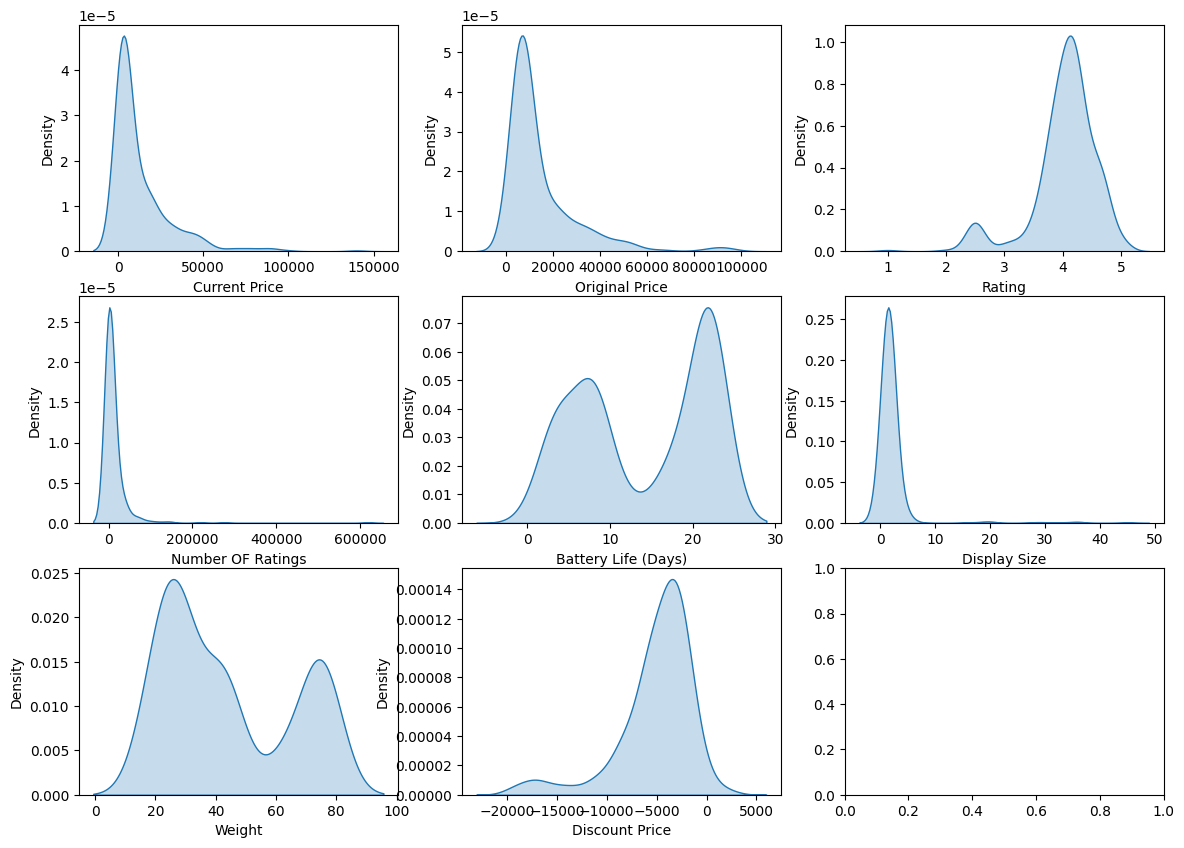

In [376]:
#Density Plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

for i, column in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)

plt.show()

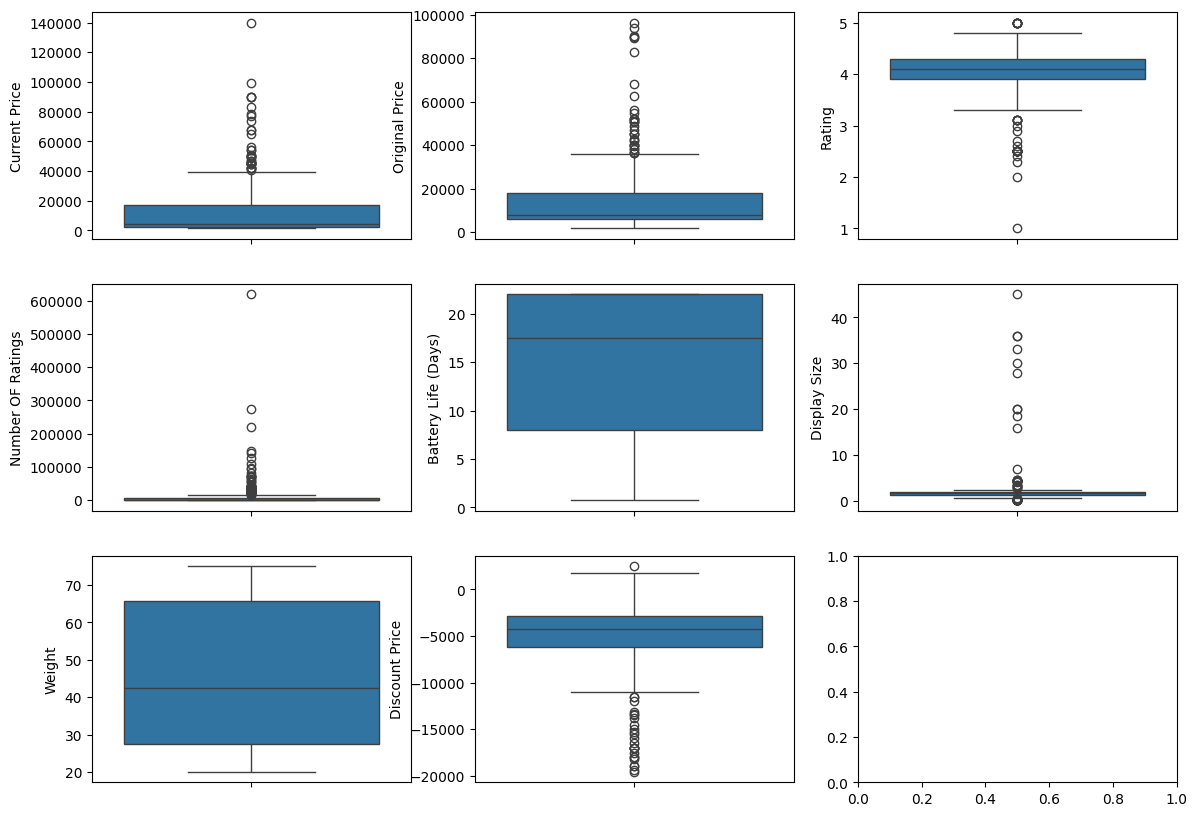

In [377]:
#Box Plot for outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))

for i, column in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax = axes[row, col]
    sns.boxplot(data=train_df[column], ax=ax)

plt.show()

We have to remove outliers and null values

In [378]:
def remove_outliers_IQR(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3- Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

#it calculates the IQR(Interquartile Range) of the column
#any data point that is below the lower bound or above the upper bound is considered an outlier
#it is not a good method to use when you have a small dataset or when you want to remove extreme outliers
#it is also not a good method to use when you have a dataset that is not normally distributed

In [379]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [380]:
import_col = ['Current Price','Original Price', 'Rating', 'Number OF Ratings','Display Size']
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

In [381]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


/tmp/ipykernel_8420/1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
/tmp/ipykernel_8420/1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [382]:
train_df.shape

(181, 15)

In [383]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [384]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
5,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000


The columns have data in various ranges of 10s, 100s, 1000s, etc, We have to normalize these.

In [385]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#it scales the data between 0 and 1
#it is useful when you have a dataset that is not normally distributed

In [386]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])
data = pd.DataFrame(data,columns=numerical_col[:-1])

In [387]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [388]:
data.shape, train_df.shape

((181, 7), (181, 15))

In [389]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000


In [390]:
train_df = pd.concat([train_df.reset_index(), data], axis=1)
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [391]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000
...,...,...,...,...,...,...,...,...
176,0.184621,0.211517,0.500000,0.000569,1.000000,0.615385,0.409091,-2000.000000
177,0.068696,0.136391,0.500000,0.000569,1.000000,0.538462,0.409091,-2700.000000
178,0.029969,0.001164,0.000000,0.000030,1.000000,1.000000,0.409091,-2.000000
179,0.120218,0.305424,0.333333,0.000000,1.000000,0.538462,0.409091,-6000.000000


### Categorical Data

In [392]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [393]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [394]:
categorical_col.remove("Bluetooth")

Doing one way Anova test to hypothesis on p values (5% confidence interval)

In [395]:
from scipy.stats import f_oneway

In [396]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(f'Anova Result for {col} is: {AnovaResults[1]}')

#It groups the data by the column where the Discount Price is the same.
#It then applies the list function to the Discount Price column
#The Anova Results will then calculate the p-value, the probability of getting the results we have if the null hypothesis is true - means of the Discount Price are the same for all the groups
#If the p-value is less than 0.05, we reject the null hypothesis

Anova Result for Brand is: 8.421850586222326e-14
Anova Result for Model Name is: 4.263744302000662e-05
Anova Result for Dial Shape is: 0.0001236872758889996
Anova Result for Strap Color is: 0.06574836943894026
Anova Result for Strap Material is: 0.00039800860157354883
Anova Result for Touchscreen is: 0.9803878528536762


Brand, Model Name, Dial Shape, Strap Material all less than 0.05 meaning high correlation with discount price

In [397]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [398]:
train_df[imp_col].isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Material    26
dtype: int64

In [399]:
for col in imp_col:
    train_df[col].fillna('other', inplace=True)

/tmp/ipykernel_8420/2024377746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('other', inplace=True)


Now we have to convert string values to numerical format before feeding to ML algorithms. <br>
Using descriptive way with dummy varaibles.

In [400]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [401]:
brand = pd.get_dummies(train_df['Brand'], drop_first=True)
#brand has no null values [296]


In [402]:
model_name = pd.get_dummies(train_df['Model Name']).drop(['other'], axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'], axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'], axis=1)
#what this does is
#it creates a new column for each category in the column
#it assigns a 1 to the category that the row belongs to and 0 to the rest of the categories
#it then drops the first category to avoid multicollinearity

In [403]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis=1)

In [404]:
imp_df.head()

,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [405]:
new_df = pd.concat([train_df[numerical_col], imp_df], axis=1)
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

In [407]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,False,True,...,False,False,False,False,False,False,True,False,False,False
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,False,False,...,False,False,False,True,False,False,False,False,False,False


In [406]:
new_df.to_csv('./data/clean.csv', index=False)